In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
x = np.array([1,1])
R = 1

xcars = np.array([[[2,2],[4,5],[1,9]],[[3,3],[5,5],[4,6]],[[4,4],[6,5],[7,3]]])
vcars = np.array([[[1,1],[1,0],[3,-3]],[[1,1],[1,0],[3,-3]],[[1,1],[1,0],[3,-3]]])
cars = {
    'pos':xcars,
    'vel':vcars
}

print(xcars)
print(cars)

[[[2 2]
  [4 5]
  [1 9]]

 [[3 3]
  [5 5]
  [4 6]]

 [[4 4]
  [6 5]
  [7 3]]]
{'pos': array([[[2, 2],
        [4, 5],
        [1, 9]],

       [[3, 3],
        [5, 5],
        [4, 6]],

       [[4, 4],
        [6, 5],
        [7, 3]]]), 'vel': array([[[ 1,  1],
        [ 1,  0],
        [ 3, -3]],

       [[ 1,  1],
        [ 1,  0],
        [ 3, -3]],

       [[ 1,  1],
        [ 1,  0],
        [ 3, -3]]])}


In [137]:
def distance(posTested,posCars):
    return np.sqrt(np.sum((posCars-posTested)**2,axis=2))

In [138]:
d = distance(x,xcars)

In [139]:
print(d)

[[1.41421356 5.         8.        ]
 [2.82842712 5.65685425 5.83095189]
 [4.24264069 6.40312424 6.32455532]]


In [140]:
def GDDWF(distance,R):
    """ 
    Gaussian distance-dependent weight function

    """
    return np.exp(-distance**2/R**2)/(np.pi*R**2)

In [141]:
f = GDDWF(d,R)
print(f)

[[4.30785586e-02 4.42066983e-12 5.10508862e-29]
 [1.06781071e-04 4.03112909e-15 5.45553998e-16]
 [4.84785312e-09 4.97480852e-19 1.35229316e-18]]


In [142]:
def density(f):
    return np.sum(f,axis=1)

In [143]:
rho = density(f)
print(rho)

[4.30785586e-02 1.06781071e-04 4.84785312e-09]


In [144]:
def localVelocity(speed,f,rho):
    normalizedSpeed = np.sqrt(np.sum(speed**2,axis=-1))
    return np.sum(normalizedSpeed*f,axis=1)/rho

In [145]:
V = localVelocity(vcars,f,rho)
print(V)

[1.41421356 1.41421356 1.41421356]


In [146]:
def Pression(position,vehicules,R):
    d = distance(position,vehicules['pos']) 
    f = GDDWF(d,R)
    rho = density(f)
    V = localVelocity(vehicules['vel'],f,rho)

    return np.mean(rho)*np.var(V)

In [147]:
Pression(x,cars,R)

np.float64(1.892470582323927e-21)

In [148]:
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
x2d,y2d = np.meshgrid(x,y)


p = np.zeros_like(x2d)
for i in range(len(x)):
    for j in range(len(x2d[i])):
        p[i,j]=Pression(np.array([x2d[i,j],y2d[i,j]]),cars,R)

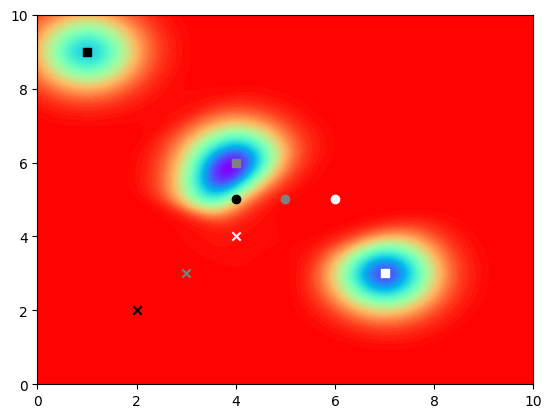

In [158]:
levels = np.linspace(-p.max(),0,100)


color=['black','gray','white']
plt.contourf(x2d,y2d,-p,levels=levels,cmap='rainbow')
for i in range(3):
    plt.scatter(xcars[i,0,0],xcars[i,0,1],marker='x',color=color[i])
    plt.scatter(xcars[i,1,0],xcars[i,1,1],marker='o',color=color[i])
    plt.scatter(xcars[i,2,0],xcars[i,2,1],marker='s',color=color[i])